#Use the D.C. Residential Properties dataset (Links to an external site.) from Kaggle to re-scale the "price" column using both z-score standardization and Min-max scaling.

HINTS: Replace or remove the missing values in the data.

Upload your notebook to your Github repository and submit the URL for this assignment.

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
filepath = "../datasets/DC_Properties.csv"

df = pd.read_csv(filepath)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
#check if any missing values in the data
df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [4]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF29D7F5C0>,
      dtype=object)

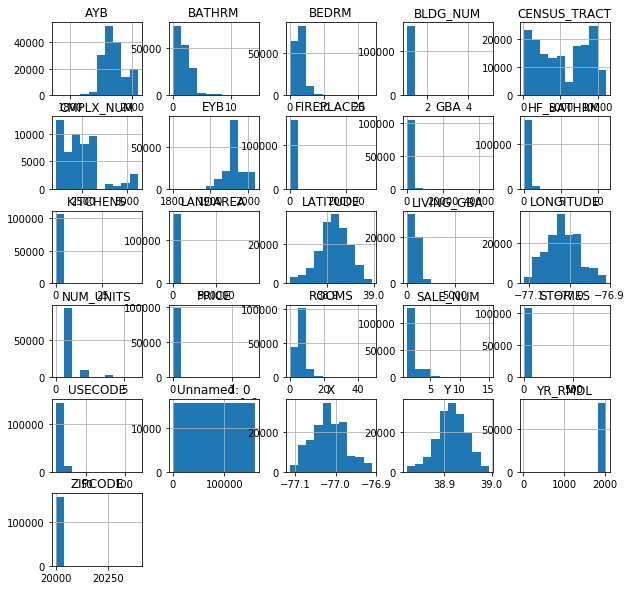

In [5]:
df.hist(figsize=(10,10))

In [6]:
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF31012B38>,
      dtype=object)

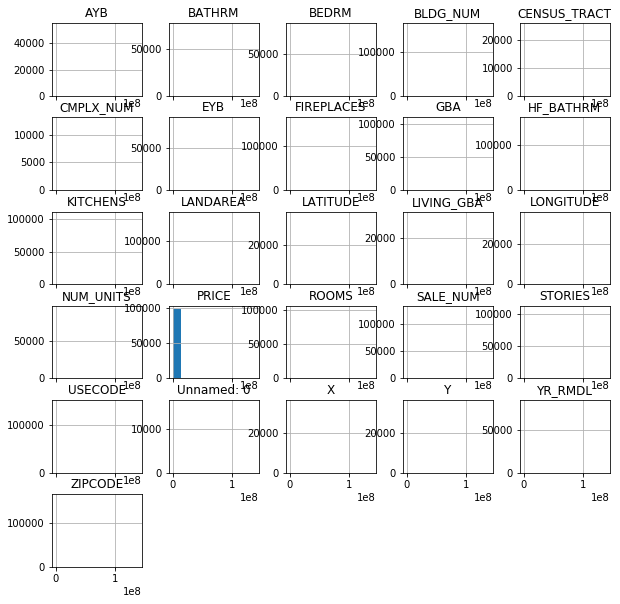

In [7]:
#plot frequency count data but using the same scale (minimum and maximum value out of all columns)
df.hist(figsize=(10,10), sharex=True)

In [8]:
df['PRICE'].head()

0    1095000.0
1          NaN
2    2100000.0
3    1602000.0
4          NaN
Name: PRICE, dtype: float64

In [9]:
meandf=df['PRICE'].mean()

In [51]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                      0
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [10]:
meandf

931351.5949336156

In [11]:
df["PRICE"].fillna(df["PRICE"].mean(), inplace=True)

In [12]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [14]:
std=df['PRICE'].std

In [16]:
#Method 1: manual calculation of z-scores for 'Glucose' column

#mean for the column
mean = df['PRICE'].mean()

#standard deviation of the column
std = df['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (df['PRICE'] - mean)/std

In [17]:
mean, std

(931351.5949342768, 5550558.004606821)

In [18]:
df["grade"].fillna(df["grade"].mean(), inplace=True)

0    2.948323e-02
1   -1.191092e-13
2    2.105461e-01
3    1.208254e-01
4   -1.191092e-13
Name: PRICE, dtype: float64

In [ ]:
price_z_manual=pd.Series(price_z_manual.reshape(-1))

In [20]:
df['price_zscore']= price_z_manual
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,price_zscore
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2.948323e-02
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,-1.191092e-13
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2.105461e-01
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1.208254e-01
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,-1.191092e-13


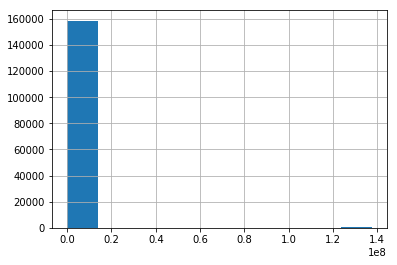

In [21]:
df['PRICE'].hist()

In [23]:
##Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
p_zscore = scaler.fit_transform(df[['PRICE']])

In [25]:
p_zscore.mean(), p_zscore.std()

(2.6641385438390238e-17, 1.0000000000000002)

In [28]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
p_z_col = pd.Series(p_zscore.reshape(-1))

In [29]:
df['price_zscore']= p_z_col
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,price_zscore
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2.948333e-02
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2.097369e-17
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2.105468e-01
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,1.208258e-01
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW,2.097369e-17


In [30]:
p_z_col.head()

0    2.948333e-02
1    2.097369e-17
2    2.105468e-01
3    1.208258e-01
4    2.097369e-17
dtype: float64

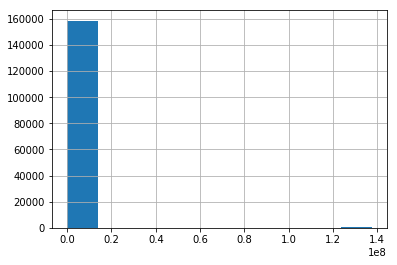

In [31]:
df['PRICE'].hist()

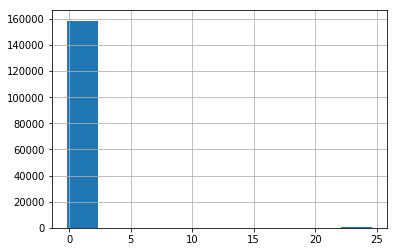

In [32]:
p_z_col.hist()

In [35]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [36]:
price_minmax = minmax_sc.fit_transform(df[['PRICE']])

In [37]:
price_minmax.mean(),price_minmax.std()

(0.0067770300467104, 0.04038885061696727)

In [38]:
p_mm_col = pd.Series(price_minmax.reshape(-1))
p_mm_col.head()

0    0.007968
1    0.006777
2    0.015281
3    0.011657
4    0.006777
dtype: float64

In [39]:
p_mm_col.min(), p_mm_col.max()

(0.0, 0.9999999999999999)

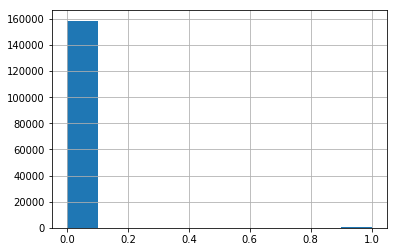

In [40]:
p_mm_col.hist()

In [44]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT',
       'price_zscore'],
      dtype='object')

In [57]:
df2=df[['BATHRM', 'BEDRM', 'ROOMS' ,'PRICE']]

In [58]:
df2

,BATHRM,BEDRM,ROOMS,PRICE
0,4,4,8,1.095000e+06
1,3,5,11,9.313516e+05
2,3,5,9,2.100000e+06
3,3,5,8,1.602000e+06
4,2,3,11,9.313516e+05
5,3,5,10,1.950000e+06
6,1,2,5,9.313516e+05
7,3,4,8,1.050000e+06
8,3,3,7,1.430000e+06
9,1,2,6,9.313516e+05


In [60]:
#show min-max scaling for all columns

#calculate z-scores
minmax_df = pd.DataFrame(minmax_sc.fit_transform(df2), columns = colnames)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


ValueError: Shape of passed values is (158957, 4), indices imply (158957, 50)